# Assessment Review

The topics covered will be:

1. Normal Distributions
2. Statistical Tests
3. Bayesian Statistics
4. Linear Regression

## Part 1: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 1: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [1]:
import scipy.stats as stats
from math import sqrt

In [2]:
# Code here
z_eight = (8-6)/2 
mu = 6
std = 2
z_eight

1.0

### Task 2: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [3]:
# Code here
over_eight = 1-stats.norm.cdf(z_eight)
over_eight

0.15865525393145707

### Task 3: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [55]:
# Code here
stats.t.interval(confidence= 0.95,                              # Confidence level
                 df= 7-1,             # Degrees of freedom
                 loc = 5,                               # Sample mean
                 scale = 0.5/(7**0.5))                                 # SCALE is equal to the std error

(4.53757712628571, 5.46242287371429)

### Task 4: Interpret the 95% Confidence Interval that you derived in the above question

Interpret: 

- We are 95% confident that the true population mean is between 4.53 and 5.46 hours of sleep


## Part 2: Hypothesis Testing

Let's make some hypotheses about cars!

### Task 5: Set Up

In [19]:
# Imports - need pandas and matplotlib
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [11]:
%ls data

 Volume in drive C has no label.
 Volume Serial Number is 1658-7586

 Directory of c:\Users\DJ\OneDrive - Zero Eyes\DJ\Flatiron\DS-NATL-010923\Phase2\PracticeCodeChallenge\data

02/08/2023  02:31 PM    <DIR>          .
02/08/2023  02:31 PM    <DIR>          ..
02/08/2023  02:31 PM            17,877 auto-mpg.csv
02/08/2023  02:31 PM            18,971 clean_house-votes-84.csv
               2 File(s)         36,848 bytes
               2 Dir(s)  330,689,404,928 bytes free


In [14]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv('data/auto-mpg.csv')

In [15]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [16]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [17]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


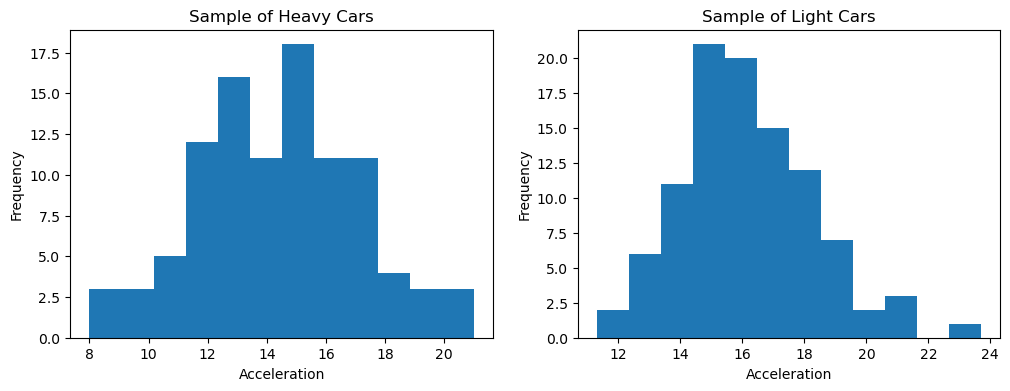

In [20]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 6: Set up the null and alternative hypotheses for this test

**Null hypothesis:**

- Light cars accelerate at the same rate or slower on average than heavy cars do


**Alternative hypothesis:**

- Light cars accelerate more quickly on average than heavy cars


### Task 7: Describe your Type 1 and Type 2 errors in this context

**Type I Error:**

- Lighter cars are claimed to be significantly quicker on average when in reality they are either the same rate or slower


**Type II Error:**

- Claiming that light cars accelerate at the same speed or slower than heavy cars when in reality they accelerate on average more quickly.

**make sure to include acceleration when typing this out**

### Task 8: The Hypothesis Test!

### 8a: Describe the type of test:

Description:

- This will be a two sample t-test as the population parameters are not known, the distrubitions are roughly normal, and the samples are thought to be independent. 


### 8b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [22]:
light_cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
319,32.2,4,108.0,75,2265,15.2,80,3,toyota corolla
269,23.2,4,156.0,105,2745,16.7,78,1,plymouth sapporo
49,28.0,4,116.0,90,2123,14.0,71,2,opel 1900
181,25.0,4,116.0,81,2220,16.9,76,2,opel 1900
337,23.5,6,173.0,110,2725,12.6,81,1,chevrolet citation
...,...,...,...,...,...,...,...,...,...
29,27.0,4,97.0,88,2130,14.5,71,3,datsun pl510
148,26.0,4,108.0,93,2391,15.5,74,3,subaru
240,21.5,4,121.0,110,2600,12.8,77,2,bmw 320i
322,40.8,4,85.0,65,2110,19.2,80,3,datsun 210


In [57]:
# Code here
stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration'], equal_var=True)

Ttest_indResult(statistic=5.00874014469676, pvalue=1.2096440668168987e-06)

### 8c: Analyze your results: can you reject the null hypothesis?

Can you reject the null hypothesis?

- As the pvalue is smaller than our alpha of 0.05, we are able to reject the null hypothesis. Lighter cans from this sample on average accelerate more quickly than heavy cars.


## Part 3: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 9: Calculate the probability

**1. Which probability are we trying to find?**

   - Given that the indvidual has voted no, what is the probability that they are a democrat
   
    
**2. Based on that, what other pieces do we need?**

   - The probability of being a republican and the probability of voting no. 
    
    
**3. Result?**

   - 97.4%
    

## Part 4: Simple Linear Regression

**BACK TO CARS**

### The Prompt:

> Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. 

Sounds like a regression problem! But first let's further explore the data.

### Task 10: Explore the Data Visually

In [25]:
import seaborn as sns

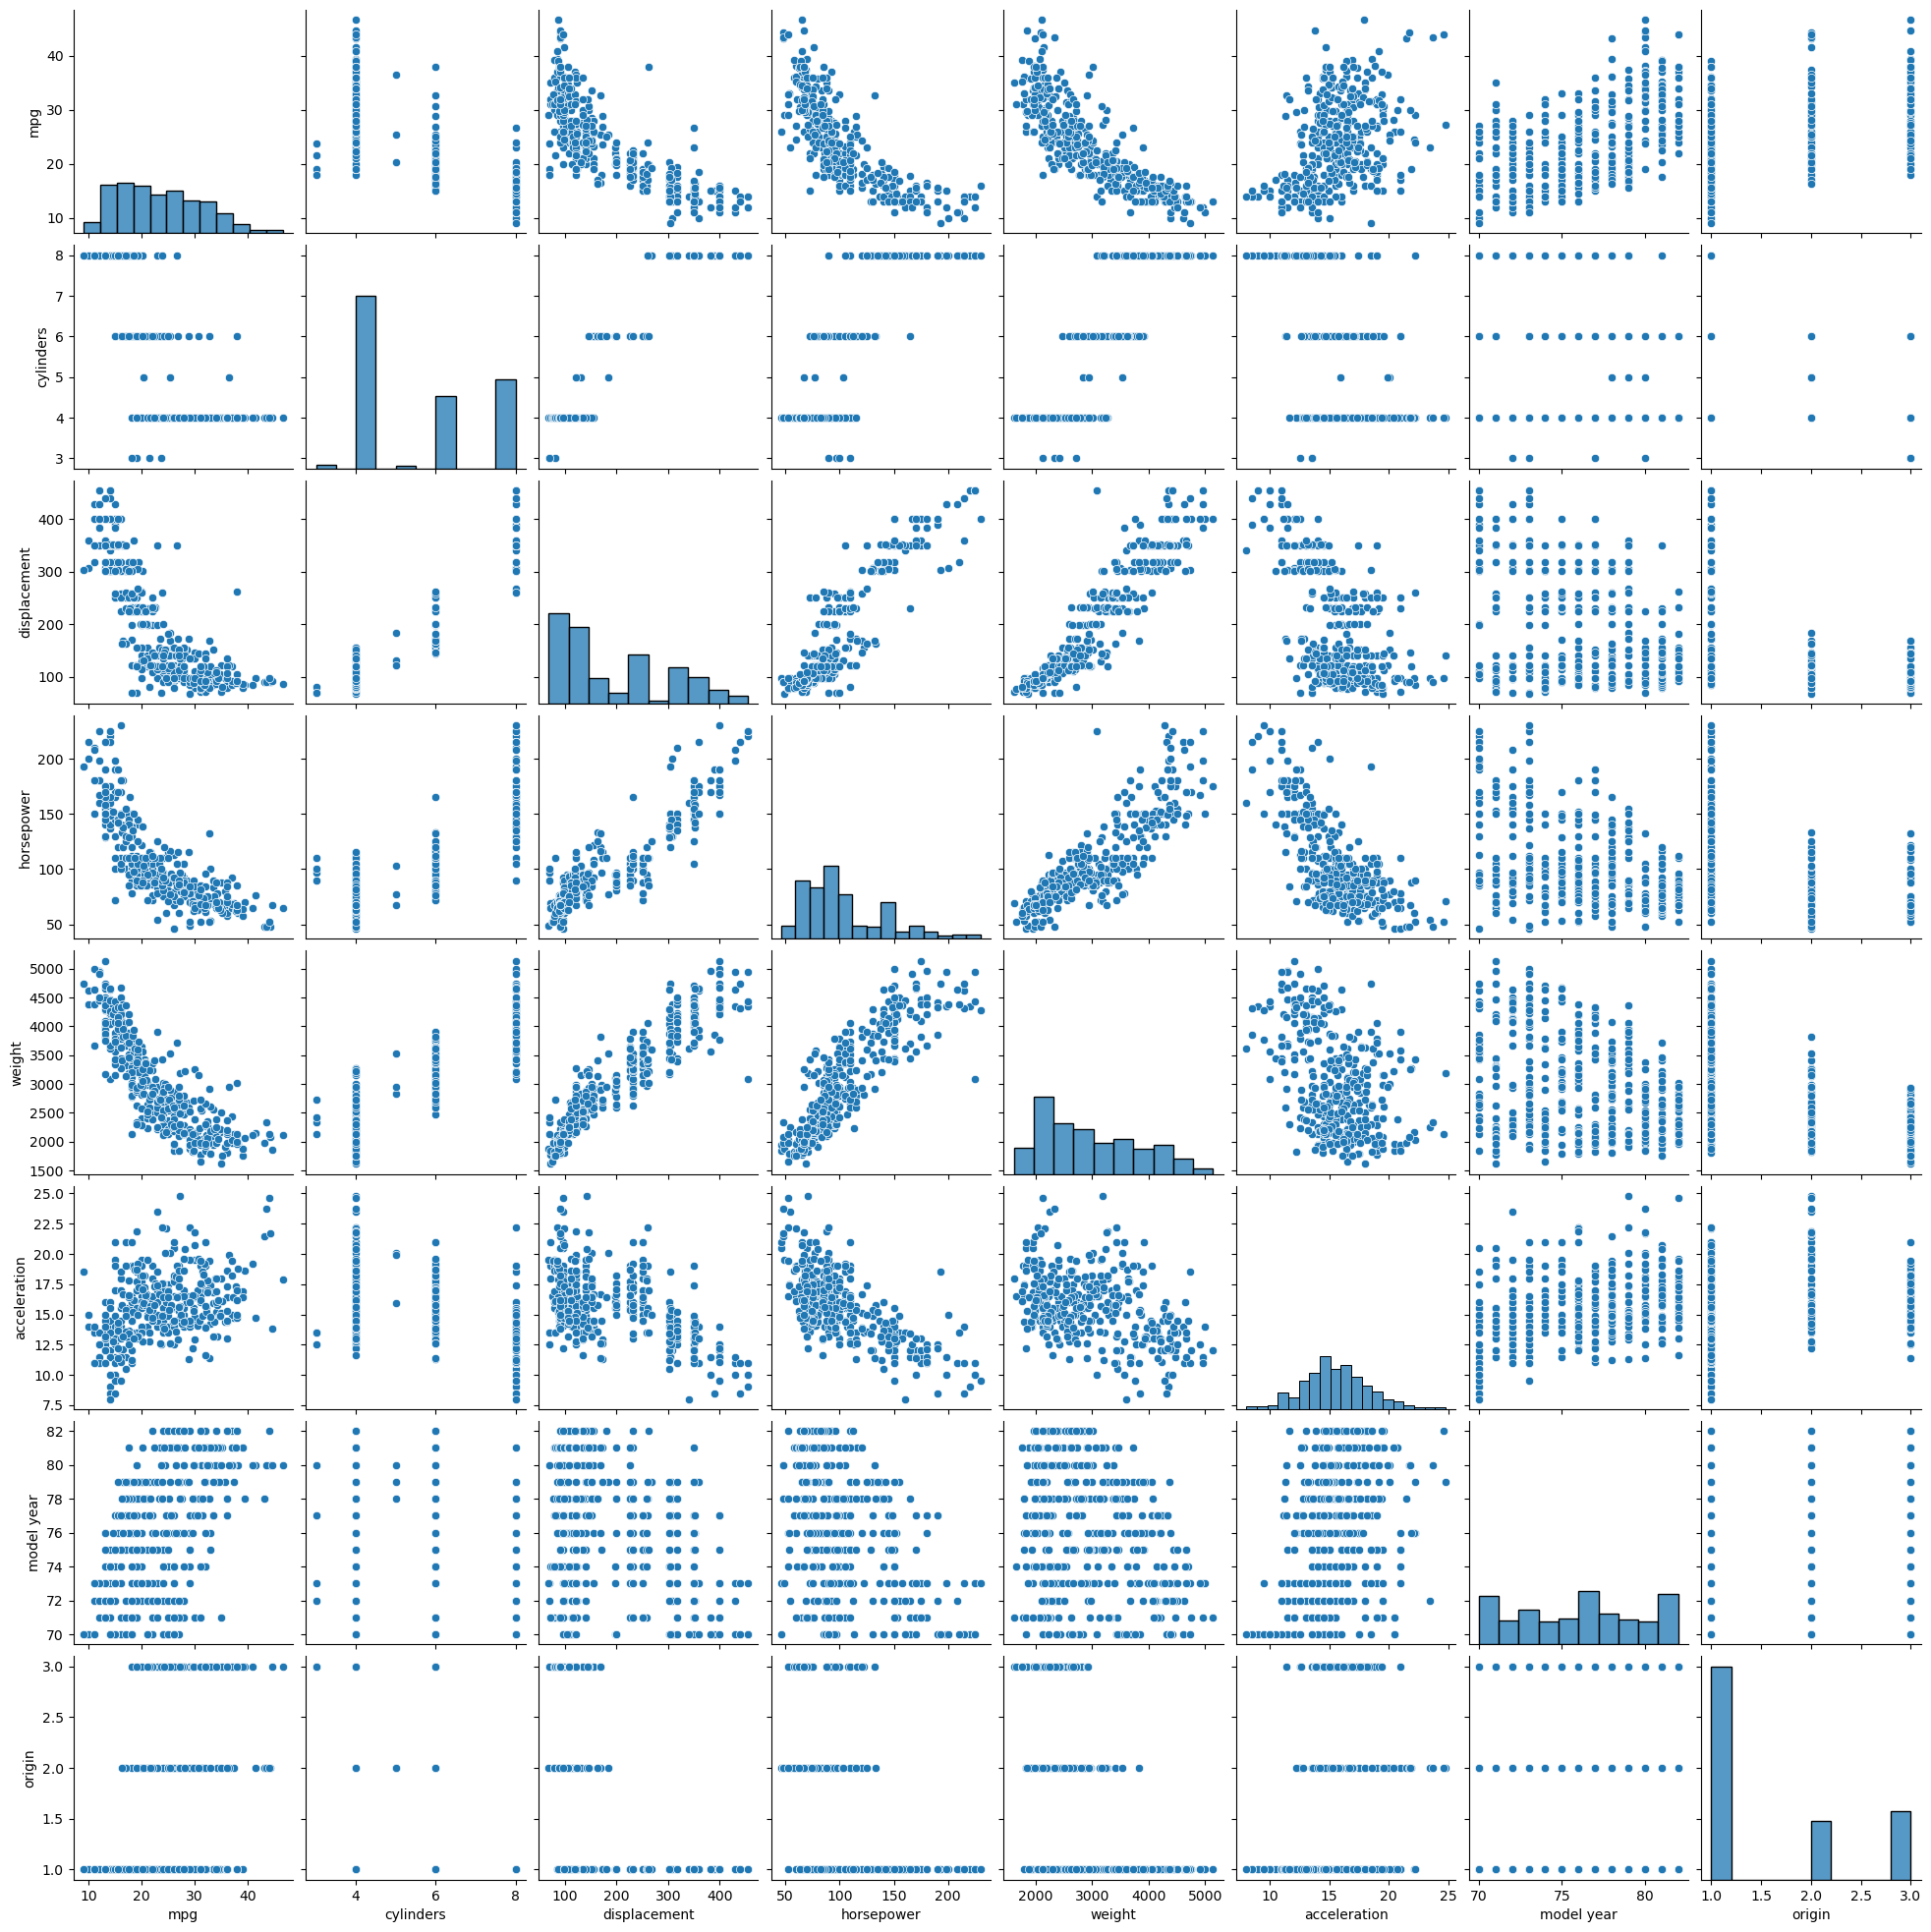

In [26]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables
sns.pairplot(df)

<AxesSubplot:>

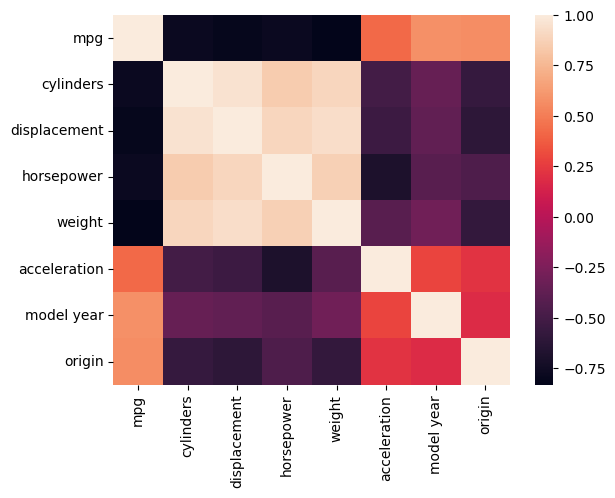

In [27]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
sns.heatmap(df.corr())

### Task 11: Explore your variables

Look at both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

**Observations:**

- Seems like weight is strongly positively correlated with displacement, horsepower, and cylinders. These are all negatively correlated with MPG. Acceleration is positively correlated with MPG but weakly. Model year is roughly more positive.


### Task 12: Pick one X variable and model

Pick the variable you think would be best to use to predict MPG, and create, fit and summarize the output of a statsmodels OLS model!

Set the summary output equal to `simple_model_summary`

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [47]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X!
x = sm.add_constant(df['weight'])
y = df['mpg']
lin_model = sm.OLS(y, x).fit()

In [48]:
simple_model_summary = lin_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          6.02e-102
Time:                        15:17:42   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 13: Interpret!

There are many things you could observe from this output, but I want especially for you to make an inference about the relationship between the X variable and MPG.

- On average, changes weight explain on average 69.3% of the variance in MPG
- For an alpha of 0.5, weight is significant predictor of MPG
- for every pound increased, MPG changes on average by -0.0076


### Task 14: Model with all numeric X variables

Create, fit and summarize the output of a statsmodels OLS model that has all of the possible X variables in our dataset!

Set the summary output equal to `model_summary`

In [58]:
# Want to use 'cylinders', 'displacement', 'horsepower', 'weight' and 'acceleration'
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [51]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X! 
data_x = df.drop(['car name', 'origin', 'model year', 'mpg'], axis=1)
data_y = df['mpg']
data_x_scaled = sm.add_constant((data_x - np.mean(data_x)) / np.std(data_x))
model = sm.OLS(data_y, data_x_scaled).fit()

c:\Users\DJ\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [53]:
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          9.82e-101
Time:                        15:20:00   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.4459      0.215    109.301      0.000      23.024      23.868
cylinders       -0.6779      0.699     -0.969      0.333      -2.053       0.697
displacement    -0.0087      0.948     -0.009      0.993      -1.873       1.855
horsepower      -1.7398      0.641     -2.716      0.007      -2.999      -0.480
weight          -4.4002      0.693     -6.351      0.000      -5.762      -3.038
acceleration    -0.0802      0.347     -0.231      0.817      -0.761       0.601
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task 15: Interpret!


Specifically, compare this model summary to your simple model's summary.

- This model explains slightly more of the variance in y on average than the previous model does when comparing the simple r^2 to the adjusted r^2 here.
- It does not appear that acceleration, displacement, or cylinders are significant predictors of MPG as they have p values above 0.05.
- for every 1 standard deviation increase in mass, there is a -4.4 std. deviation change in MPG
